In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

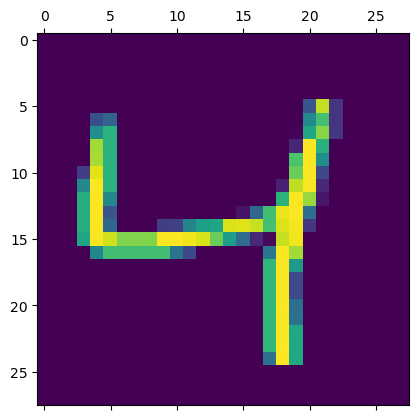

In [5]:
plt.matshow(X_train[2])

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
X_train_flatten.shape
X_test_flatten.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 371us/step - loss: 0.4711 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 1s 396us/step - loss: 0.3044 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 367us/step - loss: 0.2834 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 1s 361us/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 1s 362us/step - loss: 0.2666 - accuracy: 0.9251


In [16]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 362us/step - loss: 0.2675 - accuracy: 0.9254


[0.2675233781337738, 0.9254000186920166]

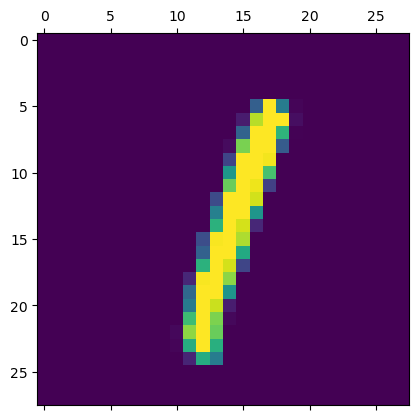

In [20]:
plt.matshow(X_test[5])

In [21]:
y_predict = model.predict(X_test_flatten)
y_predict[5]

313/313 [==============================] - 0s 288us/step


array([4.1719497e-05, 9.9790996e-01, 4.1754889e-01, 3.7147057e-01,
       6.1664167e-03, 1.4661050e-02, 8.9171296e-03, 5.9454620e-01,
       4.2146730e-01, 9.3383387e-02], dtype=float32)

In [22]:
np.argmax(y_predict[5])

1

In [23]:
y_predict_labels =[np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions =y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    2,    0,    4,   11,    3,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,   10,  921,   17,    9,    4,   12,   13,   39,    2],
       [   2,    0,   16,  929,    2,   18,    2,   11,   24,    6],
       [   1,    2,    4,    1,  927,    0,   11,    5,   10,   21],
       [   8,    3,    3,   38,   12,  761,   18,    9,   35,    5],
       [   7,    3,    6,    1,    7,    8,  922,    2,    2,    0],
       [   1,    7,   21,    6,    8,    0,    0,  961,    2,   22],
       [   5,   10,    6,   20,    9,   19,   10,   14,  877,    4],
       [  10,    7,    2,   11,   43,    6,    0,   38,   10,  882]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

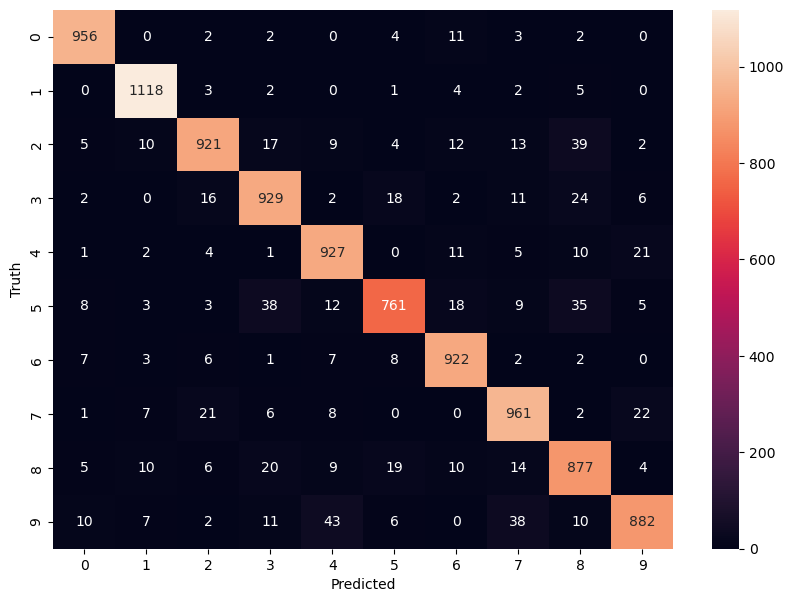

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation ='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 579us/step - loss: 0.2772 - accuracy: 0.9207
Epoch 2/5
1875/1875 [==============================] - 1s 570us/step - loss: 0.1284 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 1s 584us/step - loss: 0.0898 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 1s 576us/step - loss: 0.0680 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 1s 568us/step - loss: 0.0534 - accuracy: 0.9837


In [28]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 430us/step - loss: 0.0819 - accuracy: 0.9738


[0.08191827684640884, 0.973800003528595]

In [1]:
import math

def sigmoid(x):
    return 1/(1+math.exp(-x))

In [2]:
sigmoid(100)

1.0